<a href="https://colab.research.google.com/github/Kabir2919/Smart-Theft-Detection/blob/main/Code_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
file_path = "/content/data set.csv" # Change this to your file path
df = pd.read_csv(file_path)

In [ ]:
#Display basic dataset information
print("Dataset Information:")
df.info()
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, 1/1/2014 to FLAG
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB

First 5 Rows of the Dataset:
   1/1/2014  1/2/2014  1/3/2014  1/4/2014  1/5/2014  1/6/2014  1/7/2014  \
0       0.0       0.0      0.01       0.0       0.0      0.00      0.00   
1       0.0       0.0      0.00       0.0       0.0      0.00      0.00   
2       0.0       0.0      0.00       0.0       0.0      4.98      9.87   
3       0.0       0.0      0.00       0.0       0.0      0.00      0.00   
4       0.0       0.0      0.00       0.0       0.0      0.00      0.00   

   1/8/2014  1/9/2014  1/10/2014  ...  10/24/2016  10/25/2016  10/26/2016  \
0      0.00      0.00       0.00  ...        0.02        0.06        0.58   
1      0.00      0.00       0.00  ...       17.13       14.32       16.37   
2     11.29     13.44      11.34  ...         NaN        1.43        2.22   
3      

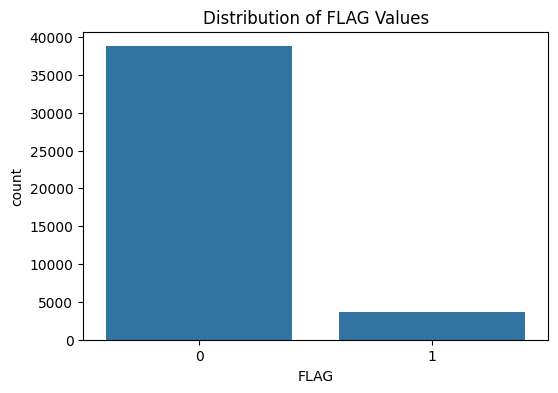

<Figure size 1200x600 with 0 Axes>

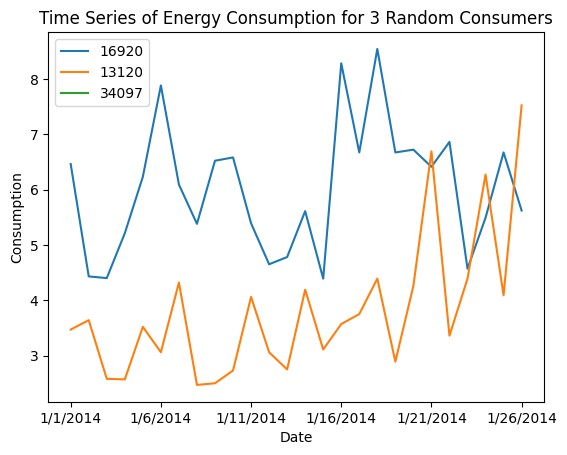

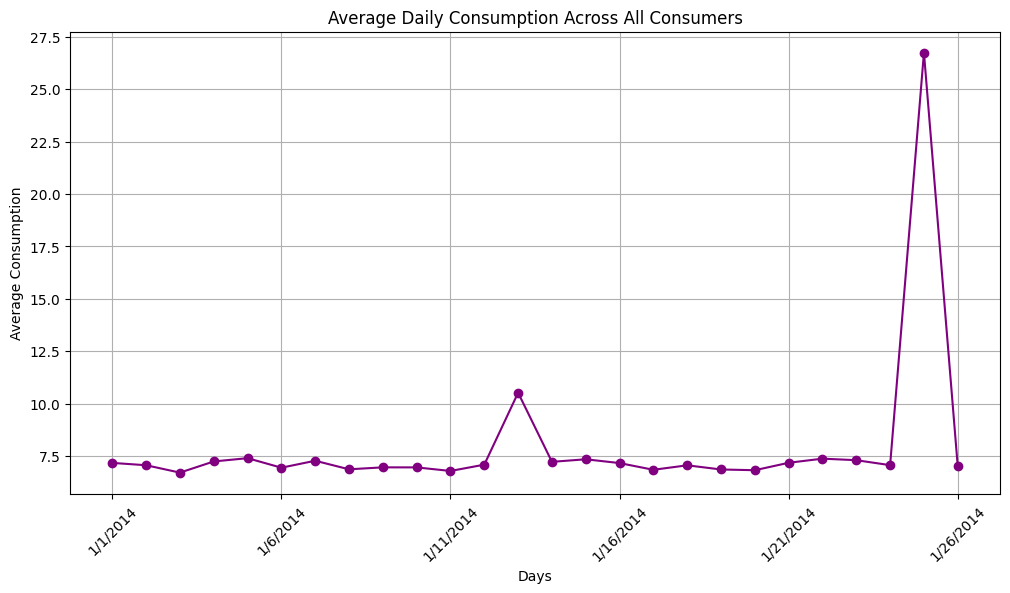

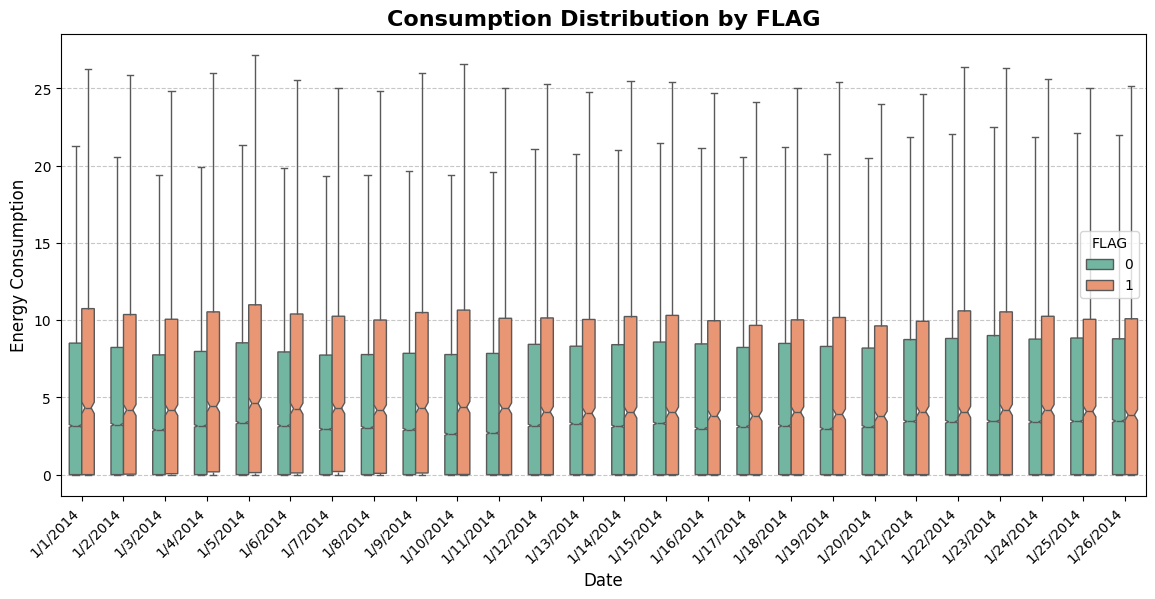

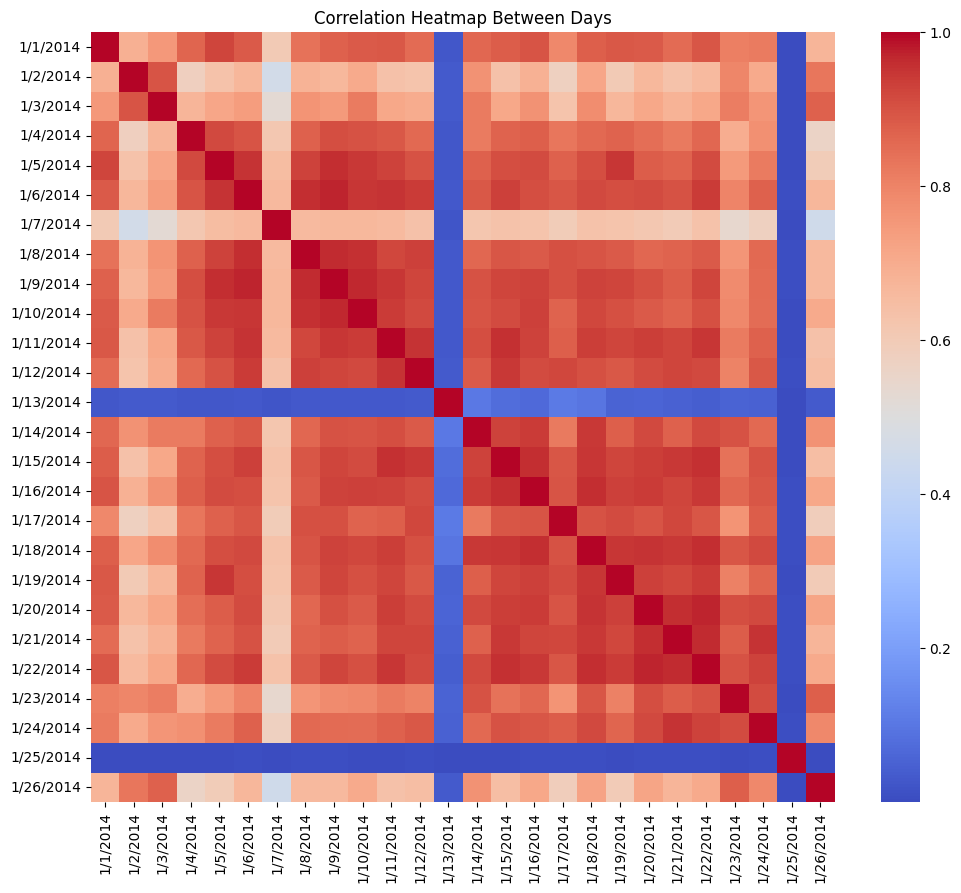

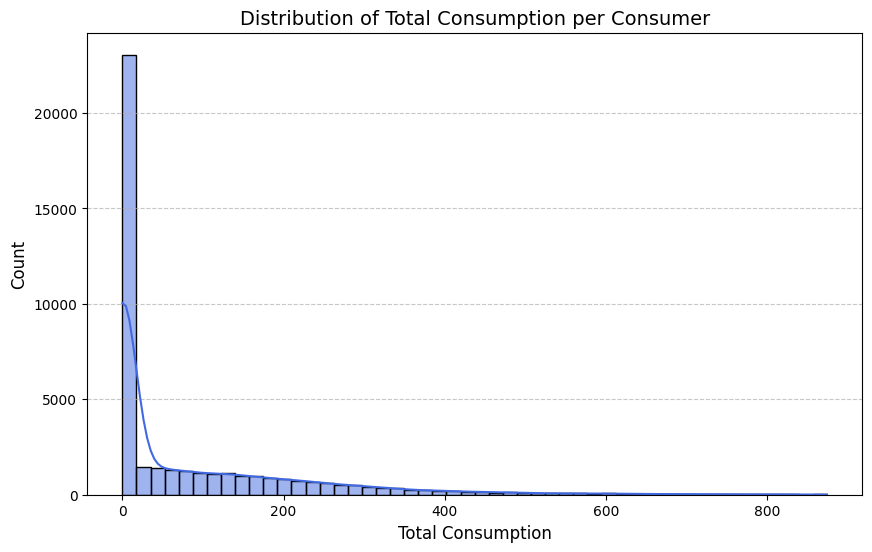

<ipython-input-4-efed264e240a>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Week', y='Consumption', data=week_comparison, palette='Set2')


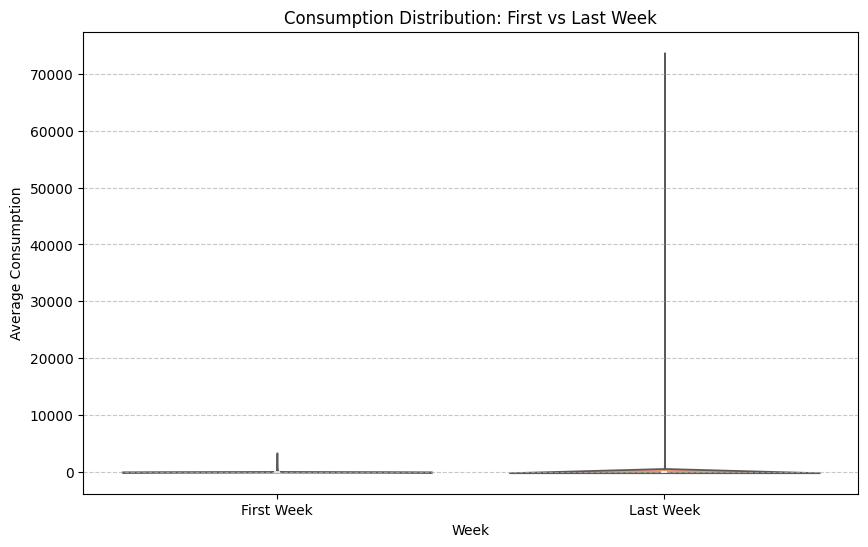

In [ ]:
 df1=df.copy()
 # 1. Distribution of FLAG values
plt.figure(figsize=(6, 4))
sns.countplot(x='FLAG', data=df1)
plt.title('Distribution of FLAG Values')
plt.show()

  # 2. Time series of energy consumption for random consumers
plt.figure(figsize=(12, 6))
sample_consumers = df1.sample(3).iloc[:, :26].T.apply(pd.to_numeric, errors='coerce')
sample_consumers.plot(title='Time Series of Energy Consumption for 3 Random Consumers')
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

  # 3. Average daily consumption across all consumers
plt.figure(figsize=(12, 6))
df1.iloc[:, :26] = df1.iloc[:, :26].apply(pd.to_numeric, errors='coerce')
daily_avg = df1.iloc[:, :26].mean()
daily_avg.plot(kind='line', color='purple', marker='o')
plt.title('Average Daily Consumption Across All Consumers')
plt.ylabel('Average Consumption')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


  # 4. Box plot of consumption distribution by FLAG
df1.iloc[:, :26] = df1.iloc[:, :26].apply(pd.to_numeric, errors='coerce')
df_melted = df1.melt(id_vars=['FLAG'], value_vars=df1.columns[:26], var_name='Date', value_name='Consumption')
df_melted.dropna(inplace=True)
threshold = df_melted['Consumption'].quantile(0.99)  # Focus on 99% of the data
df_melted = df_melted[df_melted['Consumption'] <= threshold]
plt.figure(figsize=(14, 6))
sns.boxplot(x='Date', y='Consumption', hue='FLAG', data=df_melted, notch=True, showfliers=False, palette="Set2", width=0.6)
plt.title('Consumption Distribution by FLAG', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Better spacing
plt.legend(title='FLAG', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light gridlines
plt.show()


  # 5. Heatmap of correlation between days
plt.figure(figsize=(12, 10))
sns.heatmap(df1.iloc[:, :26].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap Between Days')
plt.show()



# 6. Improved Distribution of Total Consumption per Consumer
plt.figure(figsize=(10, 6))
df1.iloc[:, :26] = df1.iloc[:, :26].apply(pd.to_numeric, errors='coerce')
df1['Total_Consumption'] = df1.iloc[:, :26].sum(axis=1)
q_low, q_high = np.percentile(df1['Total_Consumption'].dropna(), [1, 99])
df_filtered = df1[(df1['Total_Consumption'] >= q_low) & (df1['Total_Consumption'] <= q_high)]
sns.histplot(df_filtered['Total_Consumption'], bins=50, kde=True, color='royalblue')
plt.title('Distribution of Total Consumption per Consumer', fontsize=14)
plt.xlabel('Total Consumption', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


  # 7. Violin plot comparing first and last week
plt.figure(figsize=(10, 6))
df1.iloc[:, :26] = df1.iloc[:, :26].apply(pd.to_numeric, errors='coerce')
first_week = df1.iloc[:, :7].mean(axis=1, skipna=True)  # Avoids NaN issues
last_week = df1.iloc[:, 19:26].mean(axis=1, skipna=True)
week_comparison = pd.DataFrame({'First Week': first_week, 'Last Week': last_week}).melt(var_name='Week', value_name='Consumption')
week_comparison.dropna(inplace=True)
sns.violinplot(x='Week', y='Consumption', data=week_comparison, palette='Set2')
plt.title('Consumption Distribution: First vs Last Week')
plt.ylabel('Average Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Adds grid for clarity
plt.show()


In [ ]:
num_cols = df.columns[:-2]  # Exclude last two columns

# Count the number of zeroes in each of the first few columns
zero_counts = df[num_cols].eq(0).sum()

# Compute the median number of zeroes
median_zeros = zero_counts.median()

# Drop columns where the number of zeroes exceeds the median
filtered_df = df.drop(columns=zero_counts[zero_counts > median_zeros].index)

# Display the shape of the filtered dataframe to see the impact
filtered_df.shape
df=filtered_df

In [ ]:
#Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          2/20/2014     2/21/2014     2/22/2014     2/23/2014     2/24/2014  \
count  21836.000000  22489.000000  22778.000000  21878.000000  22046.000000   
mean       8.248851      8.417272      8.251481      8.163658      7.511979   
std       27.320185     34.255080     36.524519     34.004171     24.371585   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.850000      0.800000      0.750000      0.740000      0.780000   
50%        4.880000      4.760000      4.650000      4.640000      4.400000   
75%       10.132500      9.820000      9.760000      9.710000      9.070000   
max     1788.000000   1950.000000   2700.000000   2748.000000   1520.000000   

          2/25/2014     2/26/2014     2/27/2014     2/28/2014      3/1/2014  \
count  22455.000000  22492.000000  22207.000000  21387.000000  22165.000000   
mean       7.646488      7.612106      7.697884     10.525289      7.637795   
std       34.267981     33.758

In [ ]:
#Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
2/20/2014     20536
2/21/2014     19883
2/22/2014     19594
2/23/2014     20494
2/24/2014     20326
              ...  
12/29/2015    18398
12/30/2015    18391
12/31/2015    18399
CONS_NO           0
FLAG              0
Length: 519, dtype: int64


In [ ]:
#Handle missing values by replacing with mean of previous and next values
def fill_missing_values(series):
    return series.interpolate(method='linear', limit_direction='both')

for col in df.columns[:-2]:  # Exclude CONS_NO and FLAG columns
    df[col] = fill_missing_values(df[col])

# Verify missing values are handled
def check_missing_values(df):
    total_missing = df.isnull().sum().sum()
    print("\nTotal Missing Values After Handling:", total_missing)
    return total_missing == 0

print("Missing Values Fixed:", check_missing_values(df))


Total Missing Values After Handling: 0
Missing Values Fixed: True


In [ ]:
#Check class distribution in FLAG column
print("\nClass Distribution in FLAG Column:")
print(df['FLAG'].value_counts())


Class Distribution in FLAG Column:
FLAG
0    38757
1     3615
Name: count, dtype: int64


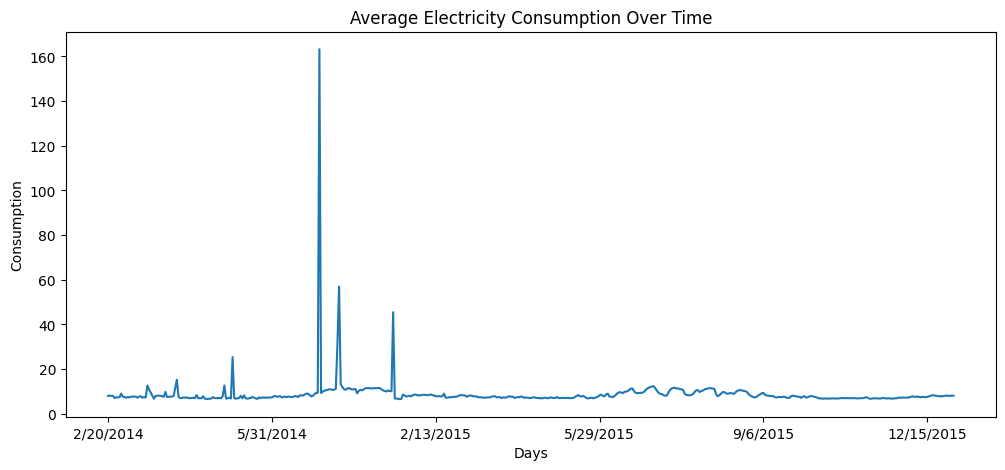

In [ ]:
#Visualize electricity consumption trends
df.iloc[:, :-2].mean().plot(figsize=(12, 5), title='Average Electricity Consumption Over Time')
plt.xlabel('Days')
plt.ylabel('Consumption')
plt.show()


In [ ]:
#Detect and handle outliers

def remove_outliers(df):
    for col in df.columns[:-2]:  # Exclude CONS_NO and FLAG columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    numeric_cols = df.select_dtypes(include=['number'])
    df[numeric_cols.columns] = df[numeric_cols.columns].apply(lambda x: x.fillna(int(x.median())))

remove_outliers(df)

# Verify outliers are handled
def check_outliers(df):
    for col in df.columns[:-2]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound).sum() > 0) or ((df[col] > upper_bound).sum() > 0):
            return False
    return True

print("Outliers Fixed:", check_outliers(df))

Outliers Fixed: False


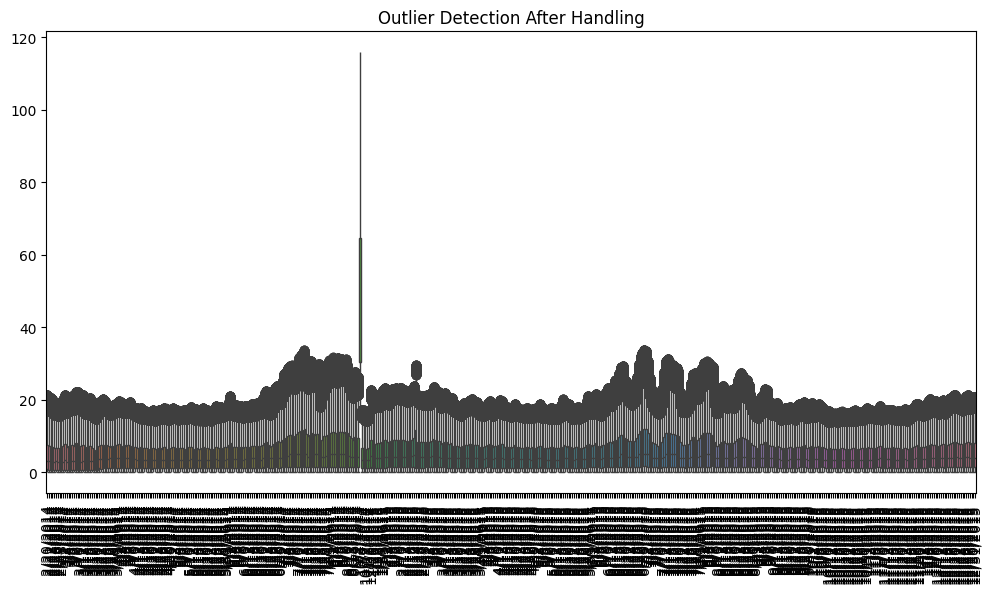

In [ ]:
#Detect outliers using box plots after handling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-2])
plt.xticks(rotation=90)
plt.title("Outlier Detection After Handling")
plt.show()

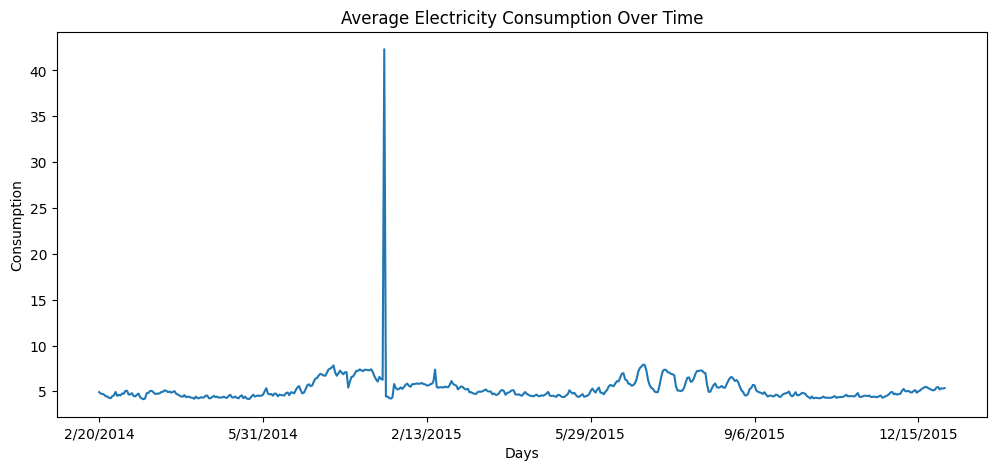

10/3/2014    42.317785
6/30/2015     7.911388
7/1/2015      7.858496
7/13/2014     7.826557
6/29/2015     7.711841
dtype: float64


In [ ]:
#Visualize electricity consumption trends
df.iloc[:, :-2].mean().plot(figsize=(12, 5), title='Average Electricity Consumption Over Time')
plt.xlabel('Days')
plt.ylabel('Consumption')
plt.show()
avg_consumption = df.iloc[:, :-2].mean().sort_values(ascending=False)

# Display the top 5 dates with the highest average consumption
top_5_dates = avg_consumption.head(5)
print(top_5_dates)

In [ ]:
# Modify the feature creation function to properly exclude non-numeric columns
def create_features(df):
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns

    # Statistical features
    df['consumption_mean'] = df[numeric_cols].mean(axis=1)
    df['consumption_std'] = df[numeric_cols].std(axis=1)
    df['consumption_min'] = df[numeric_cols].min(axis=1)
    df['consumption_max'] = df[numeric_cols].max(axis=1)

    # Trend feature (adjusting for available columns)
    if len(numeric_cols) > 1000:
        df['consumption_trend'] = df[numeric_cols[-500:]].mean(axis=1) - df[numeric_cols[:500]].mean(axis=1)

    # Periodicity features (handling date parsing safely)
    try:
        date_cols = [col for col in numeric_cols if '/' in col]
        weekend_cols = [col for col in date_cols if pd.to_datetime(col, errors='coerce').dayofweek >= 5]
        weekday_cols = [col for col in date_cols if pd.to_datetime(col, errors='coerce').dayofweek < 5]

        if weekend_cols:
            df['weekend_avg'] = df[weekend_cols].mean(axis=1)
        if weekday_cols:
            df['weekday_avg'] = df[weekday_cols].mean(axis=1)

    except Exception as e:
        print("Date parsing issue:", e)

    return df

# Apply feature creation on filtered dataframe
df = create_features(filtered_df)

# Display the first few rows to verify the new features
df.head()
def fill_missing_values(series):
    return series.interpolate(method='linear', limit_direction='both')

for col in df.columns[:-2]:  # Exclude CONS_NO and FLAG columns
    df[col] = fill_missing_values(df[col])

# Verify missing values are handled
def check_missing_values(df):
    total_missing = df.isnull().sum().sum()
    print("\nTotal Missing Values After Handling:", total_missing)
    return total_missing == 0

print("Missing Values Fixed:", check_missing_values(df))
df.head()

<ipython-input-14-cb23e15e0da2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['consumption_mean'] = df[numeric_cols].mean(axis=1)
<ipython-input-14-cb23e15e0da2>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['consumption_std'] = df[numeric_cols].std(axis=1)
<ipython-input-14-cb23e15e0da2>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-


Total Missing Values After Handling: 0
Missing Values Fixed: True


<ipython-input-14-cb23e15e0da2>:37: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return series.interpolate(method='linear', limit_direction='both')


,2/20/2014,2/21/2014,2/22/2014,2/23/2014,2/24/2014,2/25/2014,2/26/2014,2/27/2014,2/28/2014,3/1/2014,...,12/30/2015,12/31/2015,CONS_NO,FLAG,consumption_mean,consumption_std,consumption_min,consumption_max,weekend_avg,weekday_avg
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.00,0.000,0387DD8A07E07FDA6271170F86AD9151,1,0.257915,3.078087,0.0,64.6,0.107329,0.315175
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.23,0.195,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,1.627124,4.178977,0.0,64.6,1.576199,1.648854
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.46,0.390,4B75AC4F2D8434CFF62DB64D0BB43103,1,4.637963,5.747300,0.0,64.6,4.672226,4.634286
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.00,0.000,B32AC8CC6D5D805AC053557AB05F5343,1,0.183024,2.981565,0.0,64.6,0.000000,0.252848
4,3.0,3.0,3.0,3.0,3.213333,3.233333,3.006667,3.113333,2.355,3.483333,...,11.80,9.960,EDFC78B07BA2908B3395C4EB2304665E,1,3.288443,4.059349,0.0,64.6,2.058470,3.778643


In [ ]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error,
    f1_score, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced data
from imblearn.over_sampling import SMOTE

# TensorFlow / Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, LSTM, Bidirectional,
    BatchNormalization, Input
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                            confusion_matrix, classification_report, roc_auc_score)
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from scipy.stats import randint

In [ ]:
X = df.drop(columns=['CONS_NO', 'FLAG'])  # Features (all consumption columns)
y = df['FLAG']       # Target variable
X_enhanced =X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Check for missing values
print("\nMissing Values per Column:")
print(X.isnull().sum())


Missing Values per Column:
2/20/2014          0
2/21/2014          0
2/22/2014          0
2/23/2014          0
2/24/2014          0
                  ..
consumption_std    0
consumption_min    0
consumption_max    0
weekend_avg        0
weekday_avg        0
Length: 523, dtype: int64


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"RMSE: {rmse}, MAE: {mae}, F1 Score: {f1}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [ ]:
# Train LDA model
lda_model = LinearDiscriminantAnalysis(solver='svd')
lda_model.fit(X_train, y_train)

# Predict on test data
y_pred = lda_model.predict(X_test)

evaluate_model(lda_model, X_test, y_test)

RMSE: 0.22420627202661336, MAE: 0.050268452416071745, F1 Score: 0.6033519553072626, Accuracy: 0.9497315475839283
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15478
           1       0.96      0.44      0.60      1471

    accuracy                           0.95     16949
   macro avg       0.95      0.72      0.79     16949
weighted avg       0.95      0.95      0.94     16949

[[15449    29]
 [  823   648]]


In [ ]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression Performance:")
evaluate_model(log_model, X_test, y_test)

Logistic Regression Performance:
RMSE: 0.30015631068544535, MAE: 0.0900938108442976, F1 Score: 0.22917718324078748, Accuracy: 0.9099061891557024
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15478
           1       0.45      0.15      0.23      1471

    accuracy                           0.91     16949
   macro avg       0.68      0.57      0.59     16949
weighted avg       0.88      0.91      0.89     16949

[[15195   283]
 [ 1244   227]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_grid = {
    'C': [0.001],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],  # Compatible solvers for L1/L2
    'max_iter': [100, 50],
    'class_weight': ['balanced']
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7791764008704888


<Figure size 800x600 with 0 Axes>

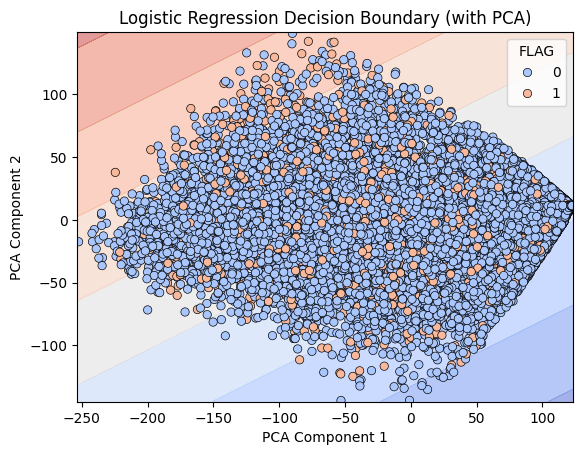

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca.fit(X_train) #Fit using the training data
X_train_pca = pca.transform(X_train)

# Train the model on the PCA-transformed training data
log_model_pca = LogisticRegression() # Create a new model for PCA data
log_model_pca.fit(X_train_pca, y_train) # Fit using transformed data

# Plot decision boundary using transformed data
plt.figure(figsize=(8,6))
DecisionBoundaryDisplay.from_estimator(log_model_pca, X_train_pca, cmap="coolwarm", alpha=0.5) #Use pca model

# Scatter plot of actual data points
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary (with PCA)")
plt.show()

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Performance:")
evaluate_model(rf_model, X_test, y_test)

Random Forest Performance:
RMSE: 0.19233650963869667, MAE: 0.03699333293999646, F1 Score: 0.7293914544669832, Accuracy: 0.9630066670600035
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15478
           1       1.00      0.57      0.73      1471

    accuracy                           0.96     16949
   macro avg       0.98      0.79      0.85     16949
weighted avg       0.96      0.96      0.96     16949

[[15477     1]
 [  626   845]]


In [ ]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)
#Hyperparameter Optimization for Random Forest
def optimize_rf(X_train, y_train):
    param_dist = {
        'n_estimators': randint(200, 1000),
        'max_depth': [None] + list(np.arange(10, 50, 5)),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
        'class_weight': [None, 'balanced', 'balanced_subsample'],
        'bootstrap': [True, False],
        'max_samples': [None, 0.7, 0.8]
    }

    model = RandomForestClassifier(warm_start=True, random_state=42, oob_score=True, n_jobs=-1)

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        verbose=2,
        random_state=42
    )

    search.fit(X_train, y_train)
    return search.best_estimator_

optimized_rf = optimize_rf(X_train_sel, y_train)

#Ensemble Stacking
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    random_state=42,
    n_jobs=-1
)

stack = StackingClassifier(
    estimators=[
        ('rf', optimized_rf),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    stack_method='predict_proba',
    n_jobs=-1
)

stack.fit(X_train_sel, y_train)

#Threshold Optimization
def optimize_threshold(model, X, y_true):
    probs = model.predict_proba(X)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    best_f1 = -1
    best_thresh = 0.5

    for thresh in thresholds:
        y_pred = (probs >= thresh).astype(int)
        current_f1 = f1_score(y_true, y_pred, pos_label=1)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_thresh = thresh

    return best_thresh

#Get optimal threshold using validation set (avoid data leakage)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_sel, y_train, test_size=0.2, stratify=y_train, random_state=42
)

stack.fit(X_train_sub, y_train_sub)
optimal_threshold = optimize_threshold(stack, X_val, y_val)

#Retrain on full training set with optimal threshold
stack.fit(X_train_sel, y_train)

#Final Evaluation
def evaluate_final(model, threshold, X_test, y_test):
    probs = model.predict_proba(X_test)[:, 1]
    y_pred = (probs >= threshold).astype(int)

    print(f"\nOptimal Threshold: {threshold:.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, probs):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot threshold analysis
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_test, (probs >= t).astype(int), pos_label=1) for t in thresholds]

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores)
    plt.axvline(threshold, color='red', linestyle='--')
    plt.title("F1 Score vs Decision Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.show()

evaluate_final(stack, optimal_threshold, X_test_sel, y_test)

#Feature Importance Analysis
def plot_feature_importance(selector, model):
    try:
        importances = model.feature_importances_
    except AttributeError:
        importances = model.final_estimator_.coef_[0]

    selected_indices = selector.get_support(indices=True)
    original_feature_count = X_enhanced.shape[1]

    # Create full importance array
    full_importances = np.zeros(original_feature_count)
    full_importances[selected_indices] = importances

    indices = np.argsort(full_importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(original_feature_count), full_importances[indices], align="center")
    plt.xticks(range(original_feature_count), indices)
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()

plot_feature_importance(selector, stack)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.7, max_samples=None, min_samples_leaf=7, min_samples_split=12, n_estimators=658; total time= 4.2min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.7, max_samples=None, min_samples_leaf=7, min_samples_split=12, n_estimators=658; total time= 4.2min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.7, max_samples=None, min_samples_leaf=7, min_samples_split=12, n_estimators=658; total time= 4.4min
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=3, n_estimators=543; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=0.3, max_samples=0.7, min_samples_leaf=5, min_samples_split=3, n_estimators=543; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=0.3

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=0.7, min_samples_leaf=4, min_samples_split=15, n_estimators=470; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=0.7, min_samples_leaf=4, min_samples_split=15, n_estimators=470; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=0.7, min_samples_leaf=4, min_samples_split=15, n_estimators=470; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=35, max_features=0.5, max_samples=None, min_samples_leaf=8, min_samples_split=17, n_estimators=948; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=35, max_features=0.5, max_samples=None, min_samples_leaf=8, min_samples_split=17, n_estimators=948; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=35, max_features=0.5, max_samples=None, min_samples_leaf=8, min

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=591; total time=  28.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=591; total time=  28.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=591; total time=  29.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.3, max_samples=None, min_samples_leaf=7, min_samples_split=10, n_estimators=227; total time=  26.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.3, max_samples=None, min_samples_leaf=7, min_samples_split=10, n_estimators=227; total time=  27.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.3, max_samples=None, min_samples_leaf=7, min_samples_split=10, n_estimators=227; total time=  27.1s
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=1, min_samples_split=17, n_estimators=702; total time= 3.0min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=1, min_samples_split=17, n_estimators=702; total time= 2.9min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=1, min_samples_split=17, n_estimators=702; total time= 3.1min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=40, max_features=0.7, max_samples=0.8, min_samples_leaf=8, min_samples_split=4, n_estimators=938; total time= 3.6min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=40, max_features=0.7, max_samples=0.8, min_samples_leaf=8, min_samples_split=4, n_estimators=938; total time= 3.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=40, max_features=0.7, max_samples=0.8, min_samples_leaf=8, min_samples_split=4, n_estimators=938; total time= 3.7min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=7, min_samples_split=15, n_estimators=994; total time=  54.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=7, min_samples_split=15, n_estimators=994; total time=  55.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=7, min_samples_split=15, n_estimators=994; total time=  53.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=4, min_samples_split=6, n_estimators=606; total time=  33.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=4, min_samples_split=6, n_estimators=606; total time=  33.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=4, min_samples_split=6, n_estimators=606; total time=  34.0s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=0.7, max_samples=0.8, min_samples_leaf=3, min_samples_split=3, n_estimators=881; total time= 5.1min
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=0.7, max_samples=0.8, min_samples_leaf=3, min_samples_split=3, n_estimators=881; total time= 5.0min
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=0.7, max_samples=0.8, min_samples_leaf=3, min_samples_split=3, n_estimators=881; total time= 5.2min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=45, max_features=0.7, max_samples=0.7, min_samples_leaf=4, min_samples_split=12, n_estimators=839; total time= 3.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=45, max_features=0.7, max_samples=0.7, min_samples_leaf=4, min_samples_split=12, n_estimators=839; total time= 3.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=45, max_features=0.7, max_samples=0.7, min_samples_leaf=4, min_samples_split=12, n_estimators=839; total time= 3.1min
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=None, min_samples_leaf=9, min_samples_split=14, n_estimators=944; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=None, min_samples_leaf=9, min_samples_split=14, n_estimators=944; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=45, max_features=sqrt, max_samples=None, min_samples_leaf=9, min_samples_split=14, n_estimators=944; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=0.3, max_samples=None, min_samples_leaf=5, min_samples_split=2, n_estimators=433; total time=  52.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=0.3, max_samples=None, min_samples_leaf=5, min_samples_split=2, n_estimators=433; total time=  50.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=0.3, max_samples=None, min_samples_leaf=5, min_samples_split=2, n_estimators=433; total time=  52.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=13, n_estimators=709; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=13, n_estimators=709; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=13, n_estimators=709; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=18, n_estimators=898; total time=  49.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=18, n_estimators=898; total time=  47.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=18, n_estimators=898; total time=  48.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=0.5, max_samples=0.7, min_samples_leaf=7, min_samples_split=6, n_estimators=935; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=0.5, max_samples=0.7, min_samples_leaf=7, min_samples_split=6, n_estimators=935; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=0.5, max_samples=0.7, min_samples_leaf=7, min_samples_split=6, n_estimators=935; total time= 2.0min
[CV] END bootstrap=True, class_weight=None, max_depth=15, max_features=log2, max_samples=None, min_samples_leaf=6, min_samples_split=5, n_estimators=638; total time=  27.9s
[CV] END bootstrap=True, class_weight=None, max_depth=15, max_features=log2, max_samples=None, min_samples_leaf=6, min_samples_split=5, n_estimators=638; total time=  27.9s
[CV] END bootstrap=True, class_weight=None, max_depth=15, max_features=log2, max_samples=None, min_samples_leaf=6, min_samples_split=5, n_estimators=638; total time=  27.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.7, max_samples=0.7, min_samples_leaf=6, min_samples_split=12, n_estimators=710; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.7, max_samples=0.7, min_samples_leaf=6, min_samples_split=12, n_estimators=710; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=0.7, max_samples=0.7, min_samples_leaf=6, min_samples_split=12, n_estimators=710; total time= 2.6min
[CV] END bootstrap=False, class_weight=None, max_depth=45, max_features=0.5, max_samples=0.8, min_samples_leaf=6, min_samples_split=17, n_estimators=548; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=45, max_features=0.5, max_samples=0.8, min_samples_leaf=6, min_samples_split=17, n_estimators=548; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=45, max_features=0.5, max_samples=0.8, min_samples_leaf=6, min_samples_split=17, n_estimators=548; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=0.3, max_samples=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=688; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=0.3, max_samples=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=688; total time= 1.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=0.3, max_samples=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=688; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=9, min_samples_split=19, n_estimators=350; total time=  14.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=9, min_samples_split=19, n_estimators=350; total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, max_samples=0.8, min_samples_leaf=9, min_samples_split=19, n_estimators=350; total time=  14.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=9, min_samples_split=18, n_estimators=201; total time=  29.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=9, min_samples_split=18, n_estimators=201; total time=  28.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=9, min_samples_split=18, n_estimators=201; total time=  30.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.7, max_samples=0.8, min_samples_leaf=7, min_samples_split=10, n_estimators=432; total time= 1.7min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.7, max_samples=0.8, min_samples_leaf=7, min_samples_split=10, n_estimators=432; total time= 1.6min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.7, max_samples=0.8, min_samples_leaf=7, min_samples_split=10, n_estimators=432; total time= 1.7min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=2, n_estimators=827; total time= 2.1min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=2, n_estimators=827; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=2, n_estimators=827; total time= 2.1min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=4, n_estimators=311; total time= 1.0min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=4, n_estimators=311; total time= 1.0min
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=0.5, max_samples=0.7, min_samples_leaf=8, min_samples_split=4, n_estimators=311; total time= 1.1min
[CV] END bootstrap=False, class_weight=None, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=2, min_samples_split=15, n_estimators=537; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, max_features=sqrt, max_samples=None, min_samples_leaf=2, min_samples

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.5, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=839; total time= 2.4min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.5, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=839; total time= 2.4min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=0.5, max_samples=0.8, min_samples_leaf=3, min_samples_split=18, n_estimators=839; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.7, max_samples=0.8, min_samples_leaf=6, min_samples_split=9, n_estimators=482; total time= 1.9min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.7, max_samples=0.8, min_samples_leaf=6, min_samples_split=9, n_estimators=482; total time= 1.9min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=0.7, max_samples=0.8, min_samples_leaf=6, min_samples_split=9, n_estimators=482; total time= 1.9min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=6, n_estimators=858; total time=  41.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=25, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=6, n_estimators=858; total time=  41.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


In [ ]:
# Support Vector Machine Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("SVM Performance:")
evaluate_model(svm_model, X_test, y_test)

In [ ]:
# Deep Learning Model (MLP)
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate MLP Model
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Performance - RMSE: {rmse_mlp}, MAE: {mae_mlp}, F1 Score: {f1_mlp}, Accuracy: {accuracy_mlp}")


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train contains binary labels: 0 and 1
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(7, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
bilstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

bilstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),
    callbacks=[lr_scheduler],
    class_weight=class_weights_dict
)


In [ ]:
#Bi directional with adam

X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Bi-directional LSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate BiLSTM Model
y_pred_bilstm = (bilstm_model.predict(X_test_lstm) > 0.5).astype("int32")
rmse_bilstm = np.sqrt(mean_squared_error(y_test, y_pred_bilstm))
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
f1_bilstm = f1_score(y_test, y_pred_bilstm)
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"BiLSTM Performance - RMSE: {rmse_bilstm}, MAE: {mae_bilstm}, F1 Score: {f1_bilstm}, Accuracy: {accuracy_bilstm}")

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_normal = X_train_scaled[y_train == 0]
X_train_norm, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

#Define Autoencoder
input_dim = X_train_norm.shape[1]
encoding_dim = input_dim // 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

#Train Autoencoder
history = autoencoder.fit(X_train_norm, X_train_norm,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_val, X_val),
                          verbose=1)

#Plot Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()

#Predict on test set
X_test_pred = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)

#Threshold using training normal data
X_train_pred = autoencoder.predict(X_train_scaled)
mse_train = np.mean(np.power(X_train_scaled - X_train_pred, 2), axis=1)
threshold = np.percentile(mse_train[y_train == 0], 95)
print(f"Reconstruction error threshold: {threshold}")

#Predict anomalies
y_pred = (mse > threshold).astype(int)

#Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
